In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dataset = pd.read_csv("Credit_Card_Applications.csv")

dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [10]:
X = dataset.drop("Class", axis = 1)
y = dataset.Class

## Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

X = sc.fit_transform(X)

In [12]:
pip install minisom

In [13]:
from minisom import MiniSom

In [32]:
som = MiniSom(x = 10,
              y = 10,
              input_len = 15,
              sigma = 1.0,
              learning_rate = 0.5,
              )

In [33]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

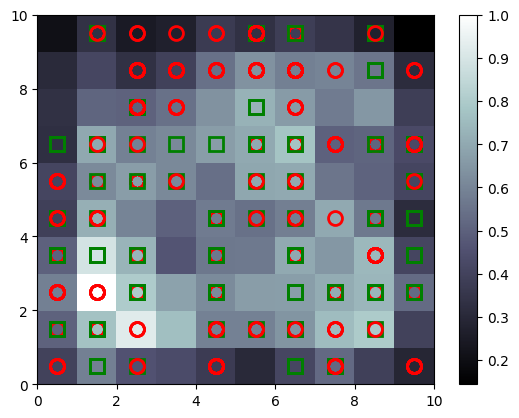

In [34]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ["o","s"]
colors = ["r","g"]

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = "None",
        markersize = 10,
        markeredgewidth = 2)


## Find the frauds

In [17]:
mappings = som.win_map(X)

In [35]:
frauds = np.concatenate((mappings[(1,2)],mappings[(2,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)
fraud_list = []

for i in range(len(frauds)):
    fraud_list.append(frauds[i][0])

In [36]:
fraud_list

[15750545.0,
 15599440.0,
 15597709.0,
 15642934.0,
 15615832.0,
 15594812.0,
 15681509.0,
 15591010.0,
 15587266.0,
 15567860.0,
 15625311.0,
 15604130.0,
 15686913.0,
 15620832.0,
 15624423.0,
 15604196.0]

In [37]:
customers = dataset.drop("CustomerID", axis = 1)

is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i,0] in fraud_list:
            is_fraud[i] = 1



**Feature Scaling**

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [39]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [40]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 2s 2ms/step - loss: 0.6395 - accuracy: 0.7435
Epoch 2/10
690/690 [==============================] - 2s 2ms/step - loss: 0.3856 - accuracy: 0.9754
Epoch 3/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2638 - accuracy: 0.9768
Epoch 4/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1939 - accuracy: 0.9768
Epoch 5/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1542 - accuracy: 0.9768
Epoch 6/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1302 - accuracy: 0.9768
Epoch 7/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1152 - accuracy: 0.9768
Epoch 8/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1061 - accuracy: 0.9768
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1001 - accuracy: 0.9768
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0956 - accuracy: 0.9768

In [41]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 1ms/step


In [ ]:
for i in range (len(y_pred)):
  print(y_pred[i][0])
